# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

Read the OkCupid profiles CSV

In [2]:
df = pd.read_csv('profiles.csv')

In [3]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

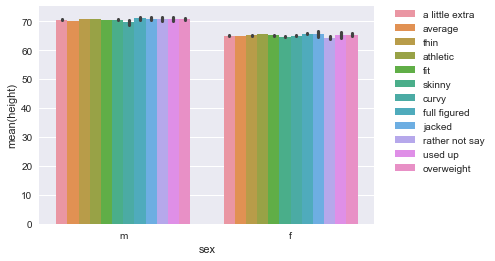

In [4]:
sns.barplot(x= 'sex', y = 'height', hue='body_type', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interestingly enough, it seems that the mean height for each body type is fairly uniform.

Now let's check how likely it is for older single females to have cats

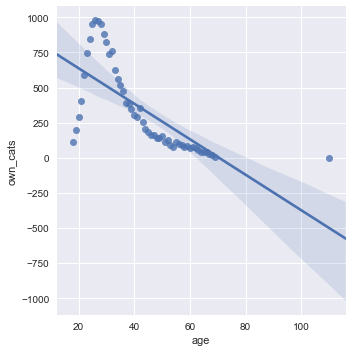

In [5]:
df['own_cats'] = df['pets'].str.contains('has cats')
df.head()
femalesByAge = df[df['sex'] == 'f'].groupby('age').count()
sns.lmplot(x = 'age', y = 'own_cats', data = femalesByAge.reset_index())

It seems that cats are actually a young person's thing!

![](https://media.giphy.com/media/3o7ate7xAJRAPujR3a/giphy.gif)

(well actually a lot more likely is that there are more young people on okCupid, who knew correlation can give the wrong idea??)

Let's make things a bit trickier, let's check the vices by age and education. We'll give a score of 1/3 for not smoking, drinking, or doing drugs.
Obiously you can also give different scores based on answers like "sometimes", but I chose to make it black and white. 

In [6]:
def countvice(x):
    count = 0
    if 'no' == x['smokes']:
        count = count + 1/3
    if 'not at all' == x['drinks']:
        count = count + 1/3
    if 'never' == x['drugs']:    
        count = count + 1/3
    return count
    
df['goodness'] = df.apply(countvice, axis = 1)

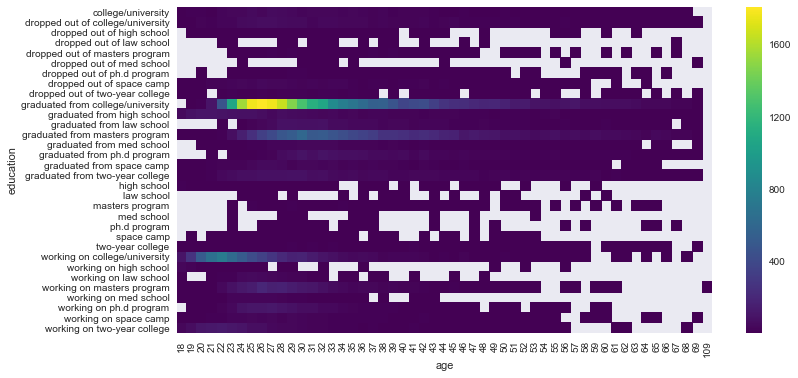

In [7]:
ageEdu = df.groupby(by=['education','age']).count()['goodness'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(ageEdu,cmap='viridis')

To make analysis over religion easier lets ignore comments such as 'serious about it'
Then we can check for sexual oriantion per reilgion

In [8]:
df['religion'] = df['religion'].str.split(' ').str.get(0)

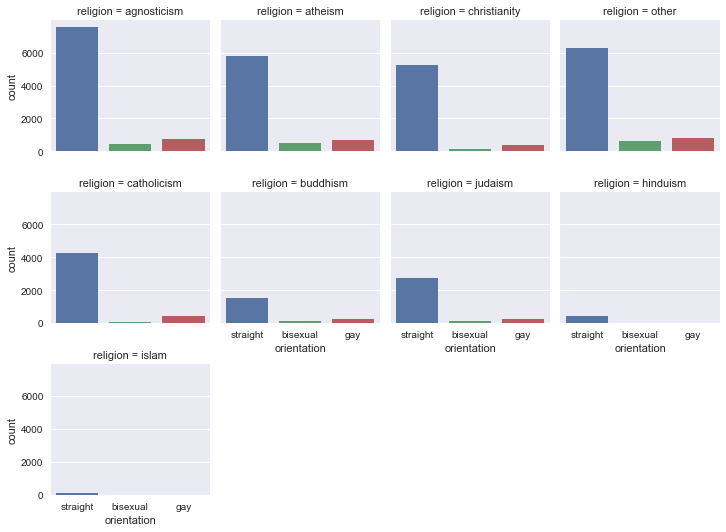

In [9]:
sns.factorplot('orientation', col= 'religion', data = df, kind = 'count', size = 2.5, col_wrap= 4)

Finally, let's check how our age poplations looks like in the 5 cities with the largest poplations of users.

In [10]:
df['location'] = df['location'].str.split(',').str.get(0)

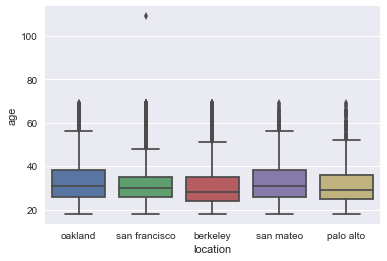

In [11]:
cities = df['location'].value_counts().head(5).index.values
sns.boxplot( x= 'location', y = 'age', data = df[df['location'].isin(cities)])

# Added more EDA with missing data

There is a lot of missing data in the Income feature, so I'll address that first.
First, most people entered sub fields to their proffesion, let's deragered that and only look at the main line of work.

In [12]:
df['job'] = df['job'].str.split(' /').str.get(0)

Now, we want to impute income based on job, so let's look at income per field

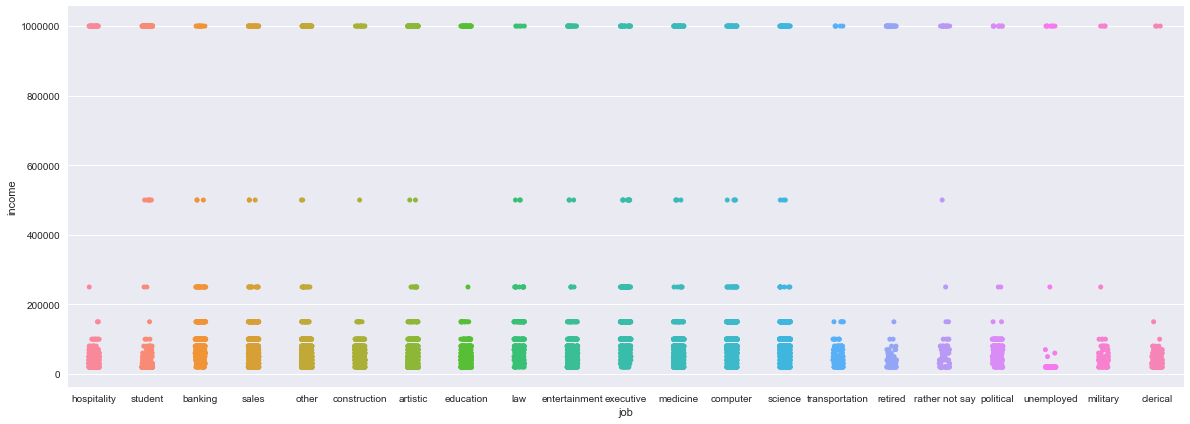

In [13]:
plt.figure(figsize= (20,7))
sns.stripplot(y='income', x = 'job', data = df[df['income'] > -1], jitter= True)

In [39]:
incomeModePerJob = {}
for job in df['job'].dropna().unique():
    incomeModePerJob[job] = df[(df['income'] > -1) & (df['job'] == job)].dropna()['income'] .mode()[0]
incomeModePerJob

{'artistic': 20000,
 'banking': 60000,
 'clerical': 20000,
 'computer': 100000,
 'construction': 20000,
 'education': 20000,
 'entertainment': 20000,
 'executive': 100000,
 'hospitality': 20000,
 'law': 70000,
 'medicine': 20000,
 'military': 40000,
 'other': 20000,
 'political': 100000,
 'rather not say': 20000,
 'retired': 20000,
 'sales': 20000,
 'science': 100000,
 'student': 20000,
 'transportation': 20000,
 'unemployed': 20000}

In [48]:
def fillincome(x):
    if (x['income'] > -1):
        return x['income']
    elif (not pd.isnull(x['job'])):
        return incomeModePerJob[x['job']]
    return None
df['income'] = df.apply(fillincome, axis = 1)

Now that we have more income data, let's look at the age gap between male and female per income.

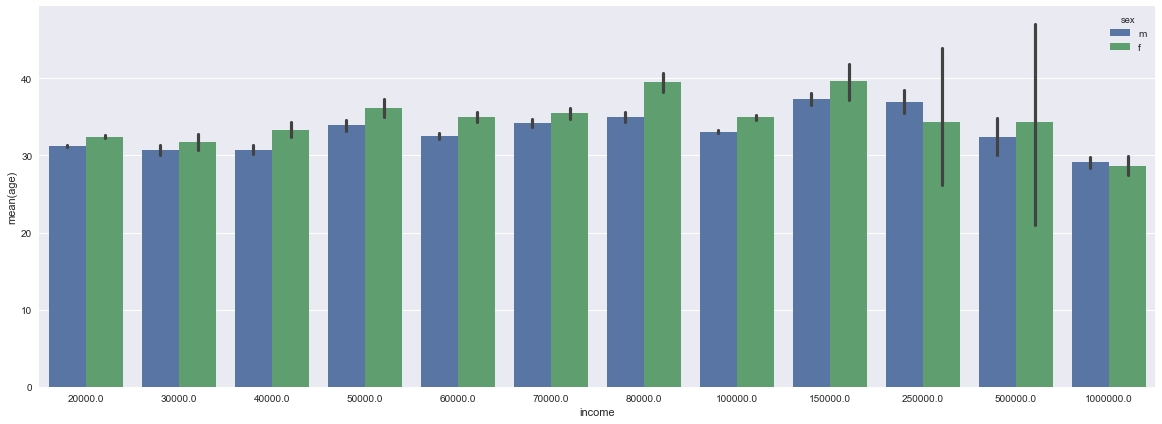

In [55]:
plt.figure(figsize= (20,7))
sns.barplot(x='income', y = 'age', hue = 'sex', data = df)

We can see that per each income, men usualy achive that salary at a younger age.